train/0/
train/1/
train/2/
train/3/
train/4/
train/5/
train/6/
train/7/
train/8/
train/9/
train/10/
train/11/
train/12/
train/13/
train/14/
train/15/
train/16/
train/17/
train/18/
train/19/
train/20/
train/21/
train/22/
train/23/
train/24/
train/25/
train/26/
train/27/
train/28/
train/29/
train/30/
train/31/
train/32/
train/33/
train/34/
train/35/
train/36/
train/37/
train/38/
train/39/
train/40/
train/41/
train/42/
Epoch 1/2
981/981 [==============================] - 57s 58ms/step - loss: 0.0107 - acc: 0.6419 - val_loss: 0.0028 - val_acc: 0.9230
Epoch 2/2
981/981 [==============================] - 56s 57ms/step - loss: 0.0034 - acc: 0.9024 - val_loss: 0.0014 - val_acc: 0.9583


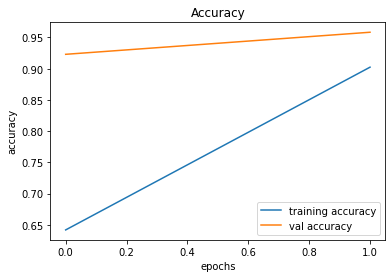

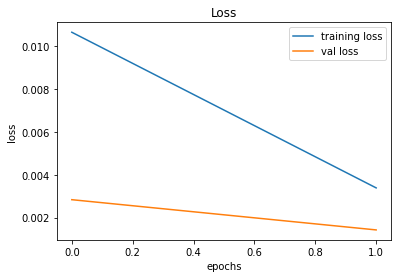

In [1]:
#credit given to WHITELORD on kaggle https://www.kaggle.com/code/whitelord/german-sign-detection-dnn-solution
#for most of t
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width * channels

for i in range(classes) :
    path = "train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_val = tf.keras.utils.to_categorical(y_val, 43)

#Definition of the DNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss=tf.keras.losses.MeanSquaredError(), 
    optimizer='adam', 
    metrics=['acc']
)

#using ten epochs for the training and saving the accuracy for each epoch
epochs = 2
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()